In [1]:
# ASOS data (5 min)
# Get reanalysis (hourly)
# load dataset and combine
# Correlation between reanalysis and observation

In [2]:
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import glob

In [3]:
!pwd

/home/jovyan


In [4]:
# read data
path = '/home/jovyan/'
file1 = 'EYW_NEW.csv'
file2 = 'EYW_Reanalysis_data.nc'
asos_data = pd.read_csv(path + file1, na_values = 'M')

In [5]:
#asos_data
asos_data['valid(UTC)'] = pd.to_datetime(asos_data['valid(UTC)']) #converting time column to pandas datetime column
asos_data = asos_data.set_index('valid(UTC)') # sets identifying column

<Axes: xlabel='valid(UTC)'>

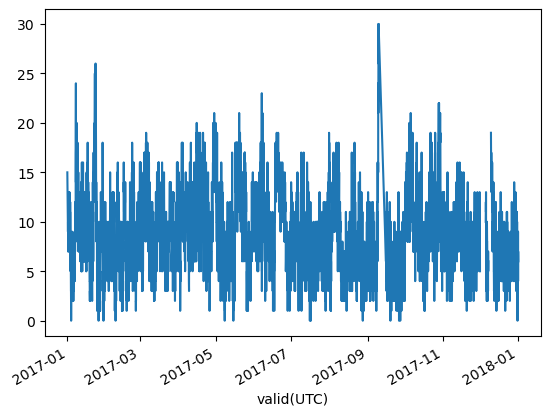

In [6]:
#asos_data['sknt']
asos_data['sknt'].plot()

In [7]:
# Convert from 5 min data to hourly data

asos_without_station = asos_data.drop(['station', 'station_name', 'tmpf', 'dwpf'], axis = 1) #drops string values 
#asos_without_station
asos_hourly_data = asos_without_station.resample('1h').mean()

In [8]:
asos_hourly_data

,lat,lon,sknt,drct
valid(UTC),,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0
2017-01-01 01:00:00,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0


<Axes: xlabel='valid(UTC)'>

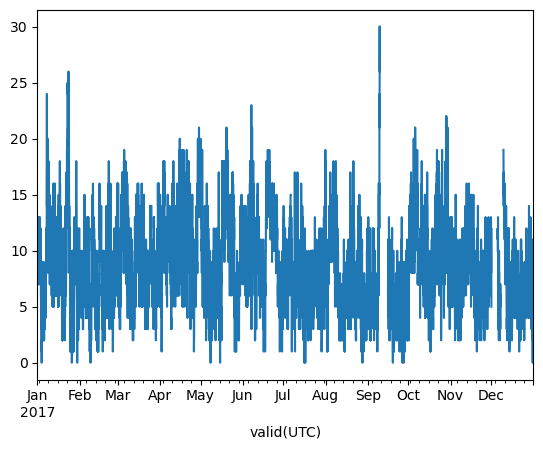

In [9]:
asos_hourly_data['sknt'].plot() #plot data

In [10]:
# read ncdf
#file2 = 'EYW_Reanalysis_data.nc'

#all_nc_files = glob.glob(path2)
#EYW_reanalysis = xr.open_mfdataset(all_nc_files)
EYW_reanalysis = xr.open_dataset(path+file2)

In [11]:
EYW_reanalysis

<xarray.Dataset> Size: 6MB
Dimensions:         (valid_time: 8760, pressure_level: 1, latitude: 9,
                     longitude: 9)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-3...
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 72B 25.5 25.25 25.0 ... 24.0 23.75 23.5
  * longitude       (longitude) float64 72B -82.7 -82.45 -82.2 ... -80.95 -80.7
    expver          (valid_time) <U4 140kB ...
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 3MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-17T17:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
#sleecting nearest pt to asos

EYW_reanalysis_lat_lon = EYW_reanalysis.sel(longitude = -81.7596, latitude = 24.5561, method = 'nearest')

In [13]:
EYW_reanalysis_lat_lon

<xarray.Dataset> Size: 280kB
Dimensions:         (valid_time: 8760, pressure_level: 1)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-3...
  * pressure_level  (pressure_level) float64 8B 1e+03
    latitude        float64 8B 24.5
    longitude       float64 8B -81.7
    expver          (valid_time) <U4 140kB ...
Data variables:
    u               (valid_time, pressure_level) float32 35kB ...
    v               (valid_time, pressure_level) float32 35kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-17T17:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
EYW_reanalysis_tabular = EYW_reanalysis_lat_lon.to_dataframe()#.drop(['z','r','t'], axis = 1) Used if we have each variable

In [15]:
EYW_reanalysis_tabular

,,number,latitude,longitude,expver,u,v
valid_time,pressure_level,,,,,,
2017-01-01 00:00:00,1000.0,0,24.5,-81.7,0001,-8.896429,4.474647
2017-01-01 01:00:00,1000.0,0,24.5,-81.7,0001,-8.757504,4.368867
2017-01-01 02:00:00,1000.0,0,24.5,-81.7,0001,-8.805059,4.617495
2017-01-01 03:00:00,1000.0,0,24.5,-81.7,0001,-9.013211,5.044473
2017-01-01 04:00:00,1000.0,0,24.5,-81.7,0001,-8.843114,5.567778
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1000.0,0,24.5,-81.7,0001,-3.079158,-2.044213
2017-12-31 20:00:00,1000.0,0,24.5,-81.7,0001,-3.109426,-1.303415
2017-12-31 21:00:00,1000.0,0,24.5,-81.7,0001,-3.231750,-0.756567


In [16]:
final_frame = EYW_reanalysis_tabular.reset_index().set_index('valid_time').drop(['latitude', 'longitude', 'number', 'expver'], axis = 1) #resetting index
final_frame

,pressure_level,u,v
valid_time,,,
2017-01-01 00:00:00,1000.0,-8.896429,4.474647
2017-01-01 01:00:00,1000.0,-8.757504,4.368867
2017-01-01 02:00:00,1000.0,-8.805059,4.617495
2017-01-01 03:00:00,1000.0,-9.013211,5.044473
2017-01-01 04:00:00,1000.0,-8.843114,5.567778
...,...,...,...
2017-12-31 19:00:00,1000.0,-3.079158,-2.044213
2017-12-31 20:00:00,1000.0,-3.109426,-1.303415
2017-12-31 21:00:00,1000.0,-3.231750,-0.756567


In [17]:
#final_frame['u']
#final_frame['v']

In [18]:
#combining datasets
#calculate wind speed from u and v components

u_wind_era = final_frame['u'].values * units('m/s')

#u_wind_era

v_wind_era = final_frame['v'].values * units('m/s')

wind_speed_era = mpcalc.wind_speed(u = u_wind_era, v = v_wind_era)
#wind_speed_era

In [19]:
wind_direction_era = mpcalc.wind_direction(u = u_wind_era, v = v_wind_era)
#wind_direction_era

In [20]:
#Adding new wind speed and direction to dataframe final_frame

final_frame['wind_speed_era'] = wind_speed_era

final_frame['wind_direction_era'] = wind_direction_era

final_frame

,pressure_level,u,v,wind_speed_era,wind_direction_era
valid_time,,,,,
2017-01-01 00:00:00,1000.0,-8.896429,4.474647,9.958359,116.701080
2017-01-01 01:00:00,1000.0,-8.757504,4.368867,9.786771,116.513290
2017-01-01 02:00:00,1000.0,-8.805059,4.617495,9.942350,117.673134
2017-01-01 03:00:00,1000.0,-9.013211,5.044473,10.328828,119.234665
2017-01-01 04:00:00,1000.0,-8.843114,5.567778,10.449919,122.195236
...,...,...,...,...,...
2017-12-31 19:00:00,1000.0,-3.079158,-2.044213,3.695946,56.420326
2017-12-31 20:00:00,1000.0,-3.109426,-1.303415,3.371560,67.257446
2017-12-31 21:00:00,1000.0,-3.231750,-0.756567,3.319126,76.824081


In [21]:
# comparing both datasets from ASOS and era5

combined_dataset = pd.merge(asos_hourly_data, final_frame, left_index = True, right_index= True, how = 'inner')

combined_dataset

,lat,lon,sknt,drct,pressure_level,u,v,wind_speed_era,wind_direction_era
valid(UTC),,,,,,,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0,1000.0,-8.896429,4.474647,9.958359,116.701080
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,1000.0,-8.757504,4.368867,9.786771,116.513290
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,1000.0,-8.805059,4.617495,9.942350,117.673134
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,1000.0,-9.013211,5.044473,10.328828,119.234665
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,1000.0,-8.843114,5.567778,10.449919,122.195236
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0,1000.0,-3.079158,-2.044213,3.695946,56.420326
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0,1000.0,-3.109426,-1.303415,3.371560,67.257446
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0,1000.0,-3.231750,-0.756567,3.319126,76.824081


In [22]:
combined_dataset['ASOS_wndspd_mps'] = combined_dataset['sknt'] / 1.9
combined_dataset

,lat,lon,sknt,drct,pressure_level,u,v,wind_speed_era,wind_direction_era,ASOS_wndspd_mps
valid(UTC),,,,,,,,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0,1000.0,-8.896429,4.474647,9.958359,116.701080,7.894737
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,1000.0,-8.757504,4.368867,9.786771,116.513290,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,1000.0,-8.805059,4.617495,9.942350,117.673134,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,1000.0,-9.013211,5.044473,10.328828,119.234665,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,1000.0,-8.843114,5.567778,10.449919,122.195236,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0,1000.0,-3.079158,-2.044213,3.695946,56.420326,4.736842
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0,1000.0,-3.109426,-1.303415,3.371560,67.257446,2.105263
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0,1000.0,-3.231750,-0.756567,3.319126,76.824081,3.684211


In [23]:
corr_coef = combined_dataset['ASOS_wndspd_mps'].corr(combined_dataset['wind_speed_era']) #correlation coefficient


In [24]:
correlation_percentage = (corr_coef * corr_coef) * 100 #find correlation percentage

print(f'{correlation_percentage} %')

51.84862322254384 %


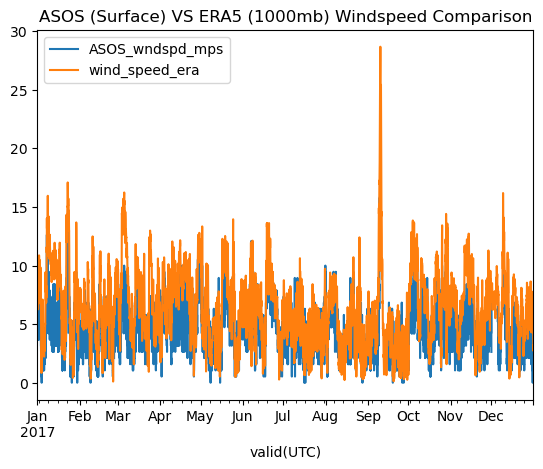

In [25]:
combined_dataset[['ASOS_wndspd_mps', 'wind_speed_era']].plot(title = 'ASOS (Surface) VS ERA5 (1000mb) Windspeed Comparison')
plt.savefig('Line_compare_ASOS_ERA5_1000mb.png',dpi=300)

<Axes: xlabel='ASOS_wndspd_mps', ylabel='wind_speed_era'>

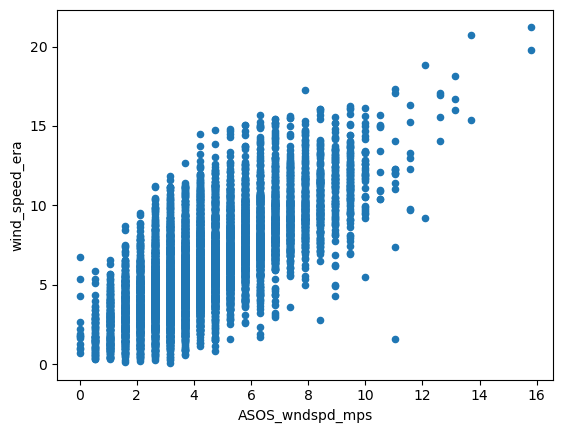

In [26]:
combined_dataset[['ASOS_wndspd_mps', 'wind_speed_era']].plot(x = 'ASOS_wndspd_mps', y = 'wind_speed_era', kind = 'scatter')

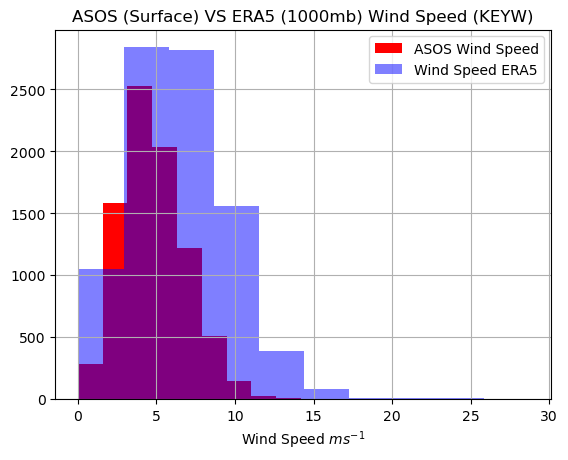

In [27]:
fig, ax = plt.subplots() #create a figure and axis object to control the plots

combined_dataset['ASOS_wndspd_mps'].hist(ax = ax, color = 'r', label = 'ASOS Wind Speed')
combined_dataset['wind_speed_era'].hist(ax = ax, color = 'b', alpha = 0.5, label = 'Wind Speed ERA5')

ax.legend()

ax.set_xlabel(r'Wind Speed $ m s^{-1} $')

ax.set_title('ASOS (Surface) VS ERA5 (1000mb) Wind Speed (KEYW)')
plt.savefig('Windspeed_compare_ASOS_ERA5_1000mb.png',dpi=300)